In [24]:
using JLD2
using OrdinaryDiffEq, Lux, StableRNGs, ComponentArrays
using DelimitedFiles, CSV, DataFrames

In [59]:
start_idx = 751
end_idx = start_idx + 1873

loaded_data = Array{Float64}(readdlm("../data/original_extrapolation.txt"))
original_data = loaded_data[start_idx:end_idx, :]

loaded_data = Array{Float64}(readdlm("../data/simple_extrapolation.txt"))
simple_data = loaded_data[start_idx:end_idx, :]

df = CSV.read("../../extrapolation.csv", DataFrame)
pinn1_data = Matrix{Float64}(df)

df = CSV.read("../../extrapolation2.csv", DataFrame)
pinn2_data = Matrix{Float64}(df)

df = CSV.read("../../extrapolation3.csv", DataFrame)
pinn3_data = Matrix{Float64}(df)

df = CSV.read("../../extrapolation4.csv", DataFrame)
pinn4_data = Matrix{Float64}(df)

1874×7 Matrix{Float64}:
  6.35896   6.0204   6.0      199.977    10.1751     0.0     0.0183025
  7.43087   6.15584  6.00004  199.824    38.324      0.0     0.139767
  9.20269   6.50221  6.00021  199.433    81.1784     0.0     0.450351
 11.6512    7.13641  6.00064  198.714   135.733      0.0     1.01892
 14.7406    8.11767  6.0015   197.6     199.136      0.0     1.89844
 18.4216    9.48831  6.003    196.042   268.635      0.0     3.1267
 22.6313   11.2744   6.00535  194.006   341.559      0.0     4.72688
 27.2949   13.4864   6.00878  191.479   415.345      0.0     6.70811
 32.3274   16.1198   6.01352  188.463   487.571      0.0     9.06624
 37.6368   19.1567   6.0198   184.977   556.018      0.0    11.7848
  ⋮                                                  ⋮      
  2.3522   97.6699   9.08486   62.7576   34.3206  1029.44   79.3829
  2.40812  97.4015   8.53845   69.1082   34.3206   929.196  79.6377
  2.57684  97.1319   8.05931   74.7155   34.3206   821.543  79.8304
  2.72531  96.8613 

In [81]:
using Plots

function plot_differences(idx)
    x = 1:size(original_data, 1)
    x /= 150.0
    
    y1 = original_data[:, idx]
    y2 = simple_data[:, idx]
    y3 = pinn1_data[:, idx]
    y4 = pinn2_data[:, idx]
    y5 = pinn3_data[:, idx]
    y6 = pinn4_data[:, idx]
    
    p = plot(x, y1, label="Four chamber model", lw=2, legend=:outerbottom, xlabel="Time (s)", ylabel="Flow (mL/s)", title="Mitral valve flow",
    size=(1000, 500), dpi=300, left_margin=5Plots.mm)
    plot!(x, y2, label="One chamber model", lw=2, linestyle=:dash)
    plot!(x, y3, label="Method 1", lw=2, linestyle=:dash)
    plot!(x, y4, label="Method 2", lw=2, linestyle=:dash)
    plot!(x, y5, label="Method 3", lw=2, linestyle=:dash)
    plot!(x, y6, label="Method 4", lw=2, linestyle=:dash)
    savefig(p, "Mvf.png")
end

plot_differences (generic function with 1 method)

In [82]:
plot_differences(6)

"/Users/michal/inzynierka/src/plots/Mvf.png"

In [57]:
function plot_diff_layout()
    layout = @layout [a b c; d e f; g e f]

    plot(
        plot_differences(1),
        plot_differences(2),
        plot_differences(3),
        plot_differences(4),
        plot_differences(5),
        plot_differences(6),
        plot_differences(7),
        layout = layout,
        size = (1000, 800)
    )
end

plot_diff_layout (generic function with 1 method)

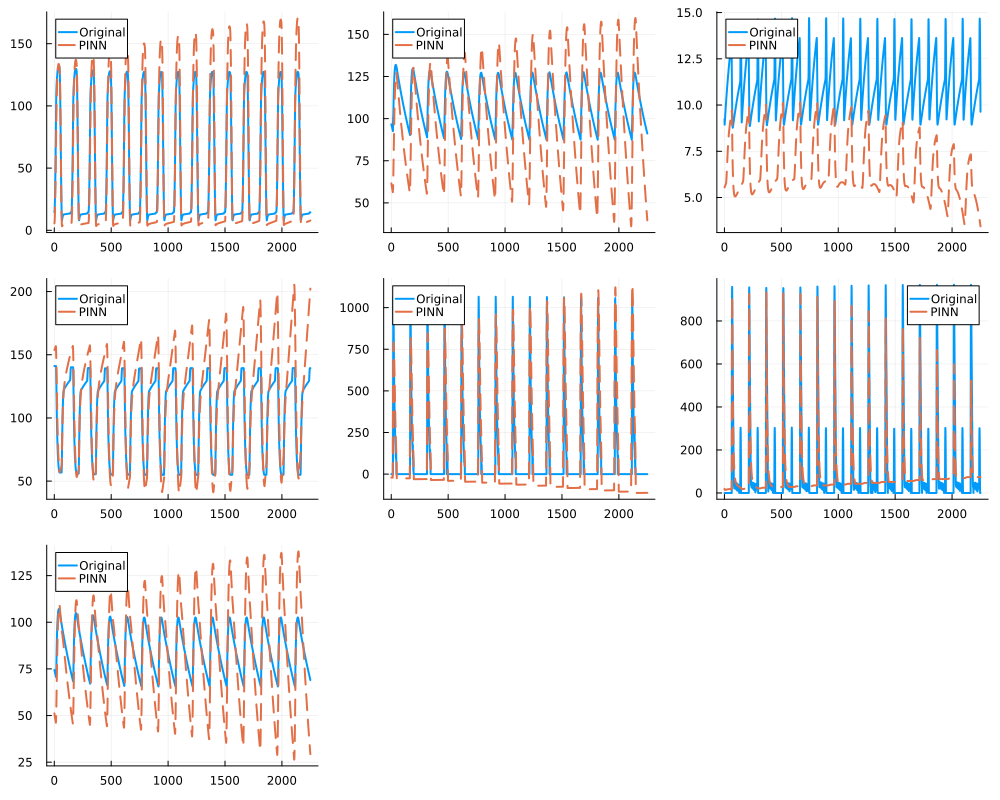

In [58]:
plot_diff_layout()